# Crear el dominio del glaciar 

En este cuaderno aprenderemos a crear el dominio del glaciar. Usaremos los netcdf creados previamente. 

## Importar librerias **`Xarray`** y **`Numpy`** 

In [1]:
# Importar las bibliotecas necesarias
# Xarray: Para manejar datos en formato NetCDF
# NumPy: Para operaciones numéricas
import xarray as xr
import numpy as np

In [15]:
# Cargar los datos del modelo de elevación digital (DEM) y la máscara desde archivos NetCDF
dem  = xr.open_dataset('./dem_pros/dem_AG_fill.nc')
mask = xr.open_dataset('./dem_pros/mask_AG.nc')
slope = xr.open_dataset('./dem_pros/slope_AG.nc')
aspect = xr.open_dataset('./dem_pros/aspect_AG.nc')

In [4]:
dem

<xarray.Dataset> Size: 5kB
Dimensions:  (lat: 30, lon: 35)
Coordinates:
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
Data variables:
    crs      |S1 1B ...
    Band1    (lat, lon) float32 4kB ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.6.2, released 2023/01/02
    history:             Mon Jul 21 23:42:35 2025: GDAL CreateCopy( ./dem_pro...

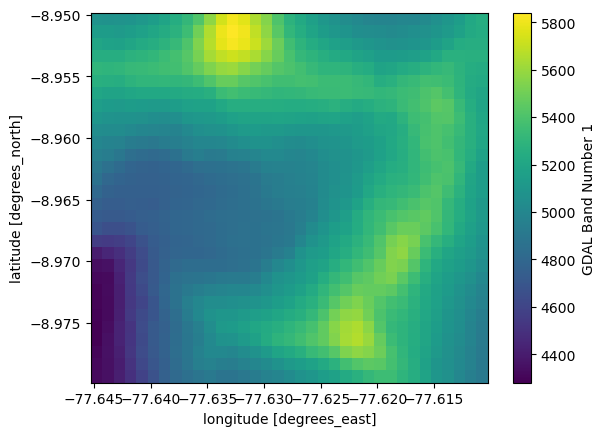

In [3]:
dem.Band1.plot()

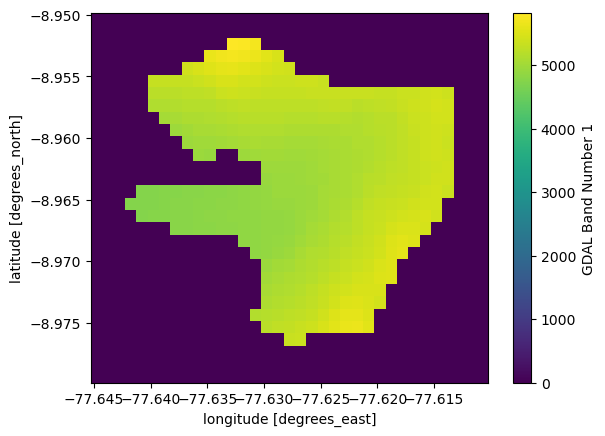

In [5]:
mask.Band1.plot()

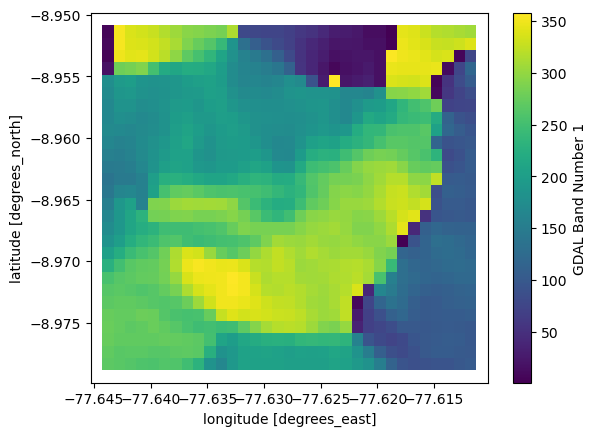

In [6]:
aspect.Band1.plot()

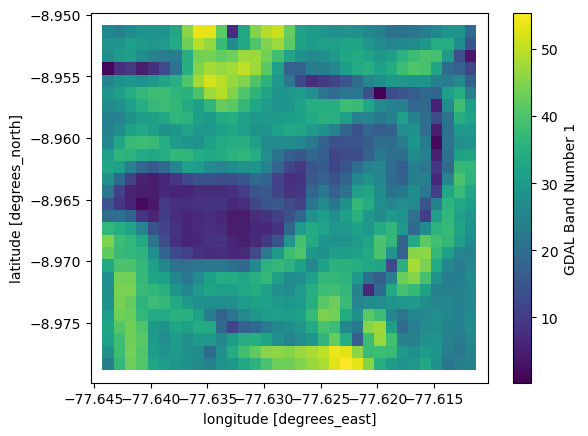

In [7]:
slope.Band1.plot()

(array([ 2.,  2.,  0.,  7.,  9., 21., 21., 15.,  8., 11.,  7., 14., 12.,
        13.,  8., 19., 19., 19., 12., 26., 18., 26., 37., 38., 52., 45.,
        50., 58., 47., 39., 43., 29., 30., 32., 23., 16., 10.,  9., 12.,
        13., 13.,  7., 12.,  5.,  5.,  2.,  1.,  3.,  3.,  1.]),
 array([ 0.25780866,  1.36059189,  2.46337509,  3.56615829,  4.6689415 ,
         5.7717247 ,  6.8745079 ,  7.97729111,  9.08007431, 10.18285751,
        11.28564072, 12.38842392, 13.49120712, 14.59399033, 15.69677353,
        16.79955673, 17.90233994, 19.00512314, 20.10790634, 21.21068954,
        22.31347275, 23.41625595, 24.51903915, 25.62182236, 26.72460556,
        27.82738876, 28.93017197, 30.03295517, 31.13573837, 32.23852158,
        33.34130478, 34.44408798, 35.54687119, 36.64965439, 37.75243759,
        38.85522079, 39.958004  , 41.0607872 , 42.1635704 , 43.26635361,
        44.36913681, 45.47192001, 46.57470322, 47.67748642, 48.78026962,
        49.88305283, 50.98583603, 52.08861923, 53.19140244,

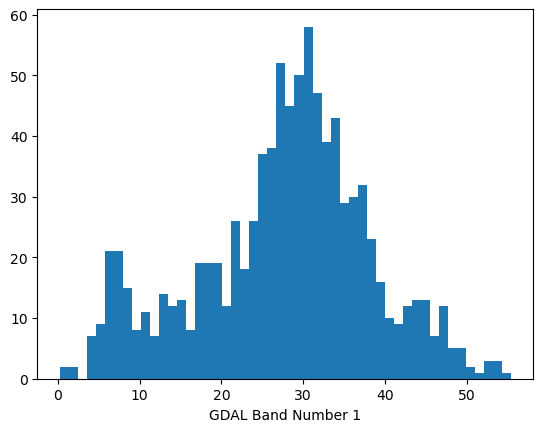

In [10]:
slope.Band1.plot.hist(bins=50)

(array([ 6., 11.,  3.,  1.,  9.,  2.,  2.,  4.,  8.,  2.,  3.,  9.,  4.,
        10., 13., 35., 25., 31., 33., 21., 31., 33., 34., 32., 37., 50.,
        50., 52., 46., 48., 53., 60., 52., 46., 48., 29., 32., 12., 15.,
        11., 13.,  7.,  4.,  6.,  3.,  3.,  3.,  2.,  3.,  3.]),
 array([4281.        , 4312.16015625, 4343.31982422, 4374.47998047,
        4405.64013672, 4436.79980469, 4467.95996094, 4499.12011719,
        4530.27978516, 4561.43994141, 4592.60009766, 4623.75976562,
        4654.91992188, 4686.08007812, 4717.24023438, 4748.39990234,
        4779.56005859, 4810.71972656, 4841.87988281, 4873.04003906,
        4904.20019531, 4935.35986328, 4966.52001953, 4997.68017578,
        5028.83984375, 5060.        , 5091.16015625, 5122.31982422,
        5153.47998047, 5184.64013672, 5215.79980469, 5246.95996094,
        5278.12011719, 5309.28027344, 5340.43994141, 5371.60009766,
        5402.75976562, 5433.91992188, 5465.08007812, 5496.24023438,
        5527.39990234, 5558.56005859

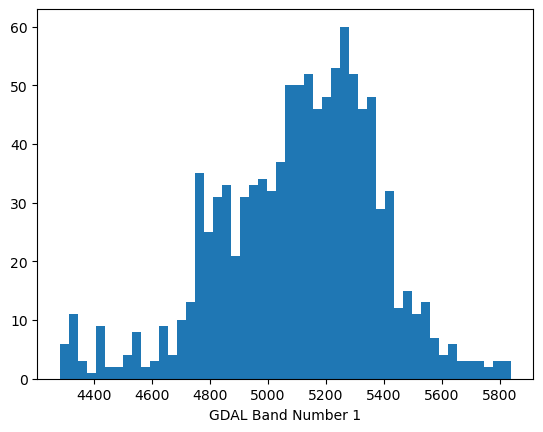

In [11]:
dem.Band1.plot.hist(bins=50)

In [17]:
mask=mask.Band1.values
mask[np.isnan(mask)]=0
mask[mask>0]=1

In [18]:
ds = xr.Dataset()
ds

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

In [25]:
ds.coords['lon'] = dem.lon.values
ds.lon.attrs['standard_name'] = 'lon'
ds.lon.attrs['long_name'] = 'longitude'
ds.lon.attrs['units'] = 'degrees_east'

ds.coords['lat'] = dem.lat.values
ds.lat.attrs['standard_name'] = 'lat'
ds.lat.attrs['long_name'] = 'latitude'
ds.lat.attrs['units'] = 'degrees_north'

In [26]:
ds

<xarray.Dataset> Size: 520B
Dimensions:  (lon: 35, lat: 30)
Coordinates:
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
Data variables:
    *empty*

In [27]:
### Función para insertar variables en el conjunto de datos
def insert_var(ds, var, name, units, long_name):
    ds[name] = (('lat','lon'), var)
    ds[name].attrs['units'] = units
    ds[name].attrs['long_name'] = long_name
    ds[name].attrs['_FillValue'] = -9999

In [28]:
insert_var(ds, dem.Band1.values, 'HGT', 'meters', 'meter above sea level')


In [29]:
ds

<xarray.Dataset> Size: 5kB
Dimensions:  (lon: 35, lat: 30)
Coordinates:
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
Data variables:
    HGT      (lat, lon) float32 4kB 4.32e+03 4.343e+03 ... 5.213e+03 5.246e+03

In [30]:
insert_var(ds, aspect.Band1.values,'ASPECT','degrees','Aspect of slope')

In [31]:
ds

<xarray.Dataset> Size: 9kB
Dimensions:  (lon: 35, lat: 30)
Coordinates:
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
Data variables:
    HGT      (lat, lon) float32 4kB 4.32e+03 4.343e+03 ... 5.213e+03 5.246e+03
    ASPECT   (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan nan

In [32]:
insert_var(ds, slope.Band1.values,'SLOPE','degrees','Terrain slope')
ds

<xarray.Dataset> Size: 13kB
Dimensions:  (lon: 35, lat: 30)
Coordinates:
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
Data variables:
    HGT      (lat, lon) float32 4kB 4.32e+03 4.343e+03 ... 5.213e+03 5.246e+03
    ASPECT   (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan nan
    SLOPE    (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan nan

In [33]:
insert_var(ds, mask,'MASK','boolean','Glacier mask')
ds

<xarray.Dataset> Size: 17kB
Dimensions:  (lon: 35, lat: 30)
Coordinates:
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
Data variables:
    HGT      (lat, lon) float32 4kB 4.32e+03 4.343e+03 ... 5.213e+03 5.246e+03
    ASPECT   (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan nan
    SLOPE    (lat, lon) float32 4kB nan nan nan nan nan ... nan nan nan nan nan
    MASK     (lat, lon) float32 4kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

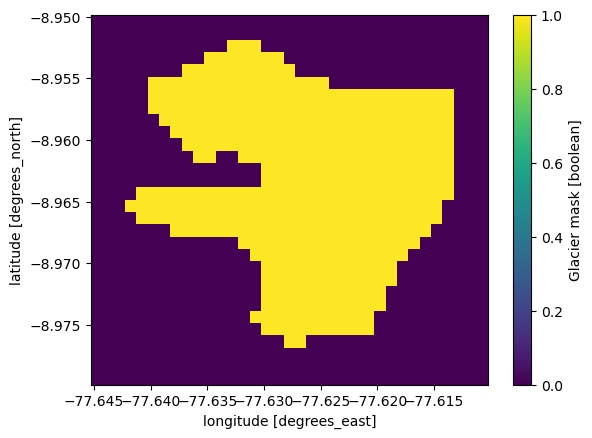

In [34]:
ds.MASK.plot()

In [35]:
print(ds.lon.min(), ds.lon.max())
print(ds.lat.min(), ds.lat.max())

<xarray.DataArray 'lon' ()> Size: 8B
array(-77.6447564) <xarray.DataArray 'lon' ()> Size: 8B
array(-77.6107564)
<xarray.DataArray 'lat' ()> Size: 8B
array(-8.97936026) <xarray.DataArray 'lat' ()> Size: 8B
array(-8.95036026)


In [36]:
### Mostrar el número de puntos de cuadrícula de los glaciares
print("Study area consists of ", np.nansum(mask[mask==1]), " glacier points")

Study area consists of  425.0  glacier points


In [37]:
### Guardar el archivo estático combinado
ds.to_netcdf('./dom/dom_AG.nc')

(array([10., 12., 10., 15., 11., 12., 15., 14., 20., 18., 30., 19., 26.,
        23., 27., 22., 27., 26., 28., 15., 13.,  8.,  9.,  4.,  3.,  2.,
         2.,  2.,  0.,  2.]),
 array([4733.        , 4769.23339844, 4805.46679688, 4841.70019531,
        4877.93310547, 4914.16650391, 4950.39990234, 4986.63330078,
        5022.86669922, 5059.10009766, 5095.33349609, 5131.56689453,
        5167.79980469, 5204.03320312, 5240.26660156, 5276.5       ,
        5312.73339844, 5348.96679688, 5385.20019531, 5421.43359375,
        5457.66650391, 5493.89990234, 5530.13330078, 5566.36669922,
        5602.60009766, 5638.83349609, 5675.06640625, 5711.29980469,
        5747.53320312, 5783.76660156, 5820.        ]),
 <BarContainer object of 30 artists>)

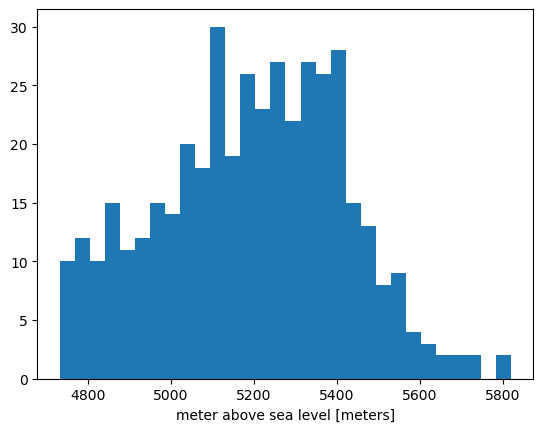

In [42]:
ds.HGT.where(ds.MASK==1).plot.hist(bins=30)

(array([ 3., 11., 30., 19., 16., 18., 23., 23., 24., 27., 40., 51., 43.,
        35., 23., 14.,  7.,  5.,  9.,  4.]),
 array([ 0.25780866,  2.83258772,  5.40736675,  7.98214579, 10.55692482,
        13.13170433, 15.70648289, 18.28126144, 20.85604095, 23.43082047,
        26.00559998, 28.58037758, 31.15515709, 33.72993469, 36.3047142 ,
        38.87949371, 41.45427322, 44.02905273, 46.60383224, 49.17861176,
        51.75338745]),
 <BarContainer object of 20 artists>)

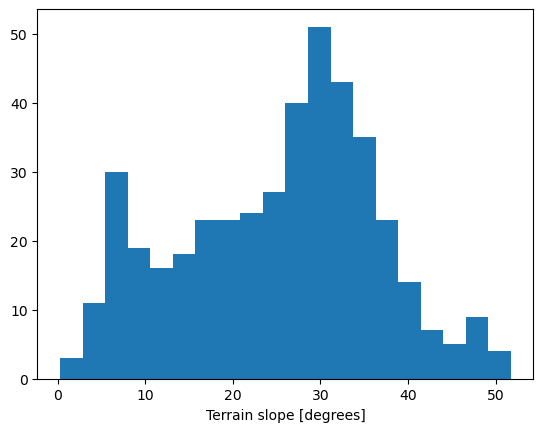

In [44]:
ds.SLOPE.where(ds.MASK==1).plot.hist(bins=20)

(array([ 3.,  0.,  3.,  2.,  2.,  2.,  2.,  7.,  2.,  7.,  3.,  2.,  2.,
         7., 18., 38., 36., 28., 10., 15., 15., 15., 23., 17., 20., 33.,
        53., 36., 17.,  7.]),
 array([  1.40698242,  12.79835606,  24.18972969,  35.58110428,
         46.97247696,  58.36384964,  69.75522614,  81.14659882,
         92.5379715 , 103.92934418, 115.32071686, 126.71208954,
        138.10346985, 149.49484253, 160.88621521, 172.27758789,
        183.66896057, 195.06033325, 206.45170593, 217.84307861,
        229.23445129, 240.62582397, 252.01719666, 263.40856934,
        274.79995728, 286.1913147 , 297.58270264, 308.97406006,
        320.365448  , 331.75680542, 343.14819336]),
 <BarContainer object of 30 artists>)

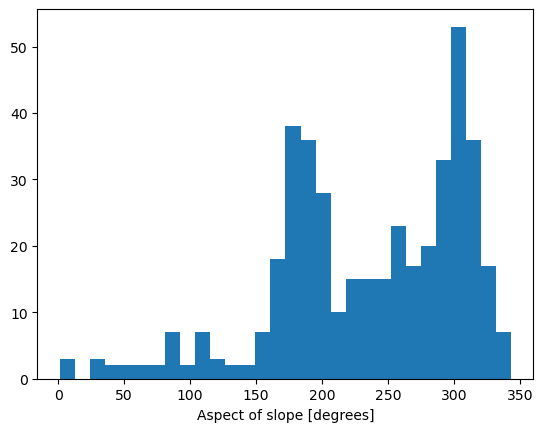

In [45]:
ds.ASPECT.where(ds.MASK==1).plot.hist(bins=30)